#**Tour Package** 

---
##**Context**
Company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.The company is now planning to launch a new product i.e. **Tourism Package System**. 

Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

##**Problem**

1. To predict which customer is more likely to purchase the newly    introduced travel package
2. Which variables are most significant.
3. Which segment of customers should be targeted more.



##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Getting Data

In [2]:
df_pack = pd.read_csv('/content/drive/MyDrive/data/Tour_Package/tour_package.csv')
df_pack.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df_pack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
# checking for missing value
df_pack.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Observation

1. There are lot of missing values.
2. 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further
3. 4.77% values are missig from MonthlyIncome.
4. Age has 4.62 % missing values.
5. NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values
6. ProdTaken is the Target Variable
7. Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.



In [ ]:
df_pack.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
df_pack['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Observation

1. Minimum age of customer is 18 and Maximum age is 61 with mean of 37.
2. Mean Duration of pitch is 15 mins to max of 127 mins.
3. Mean Number of trips is 3 with maximum of 22.
4. Average monthly income of customer is 23619 with maximum of 98678. This needs to be verified
5. 920 customer had taken package last time.


##Data Preprocessing

In [3]:
## Droping customer id
df_pack.drop('CustomerID',axis=1,inplace=True)

In [ ]:
category = []
for i in df_pack.columns:
  if df_pack[i].dtype=='O':
    category.append(i)
category

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [ ]:
for i in category:
  print(i)
  print(df_pack[i].value_counts())
  print('-'*60)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------------------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------------------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------------------------------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------------------------------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP  

In [ ]:
df_pack.describe(include='object').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [ ]:
df_pack['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

In [ ]:
df_pack['DurationOfPitch'].value_counts()

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64

In [ ]:
df_pack['NumberOfPersonVisiting'].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [ ]:
df_pack['NumberOfFollowups'].value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

In [ ]:
df_pack['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df_pack['Passport'].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

In [ ]:
df_pack['NumberOfChildrenVisiting'].value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

In [ ]:
df_pack['OwnCar'].value_counts()

1    3032
0    1856
Name: OwnCar, dtype: int64

Observations


1. Single and unmarried status are not same category . Unmarried here means customers having partners.
2. Female and Fe male are same category , Data needs to be fixed
3. 3 star property is prefered by customers
4. Most of the customers are from Tier1 cities
5. Total of 3 (Both Parents and 1 child) are more likely to travel 
6. Approx 62 percents have own car and 65 percents have passports

In [4]:
## Merging Fe male and Female
df_pack['Gender'] = df_pack['Gender'].replace('Fe Male','Female')


In [5]:
df_pack['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [6]:
## creating bins for Age and Monthly income

df_pack['Agebin'] = pd.cut(df_pack['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

df_pack['MonthlyIncomebin'] = pd.cut(df_pack['MonthlyIncome'],bins=[0,10000,20000,30000,40000,100000],
                                     labels=['<10000','<20000','<30000','<40000','<100000'])

In [ ]:
print(df_pack['Agebin'].value_counts())
print('*'*50)
print(df_pack['MonthlyIncomebin'].value_counts())

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64
**************************************************
<30000     3025
<20000     1038
<40000      588
<10000        2
<100000       2
Name: MonthlyIncomebin, dtype: int64


Observations

1. Most of the people belongs from age group of 31-40.
2. 20000-30000 is the income of most of the people.

## Data Visualization

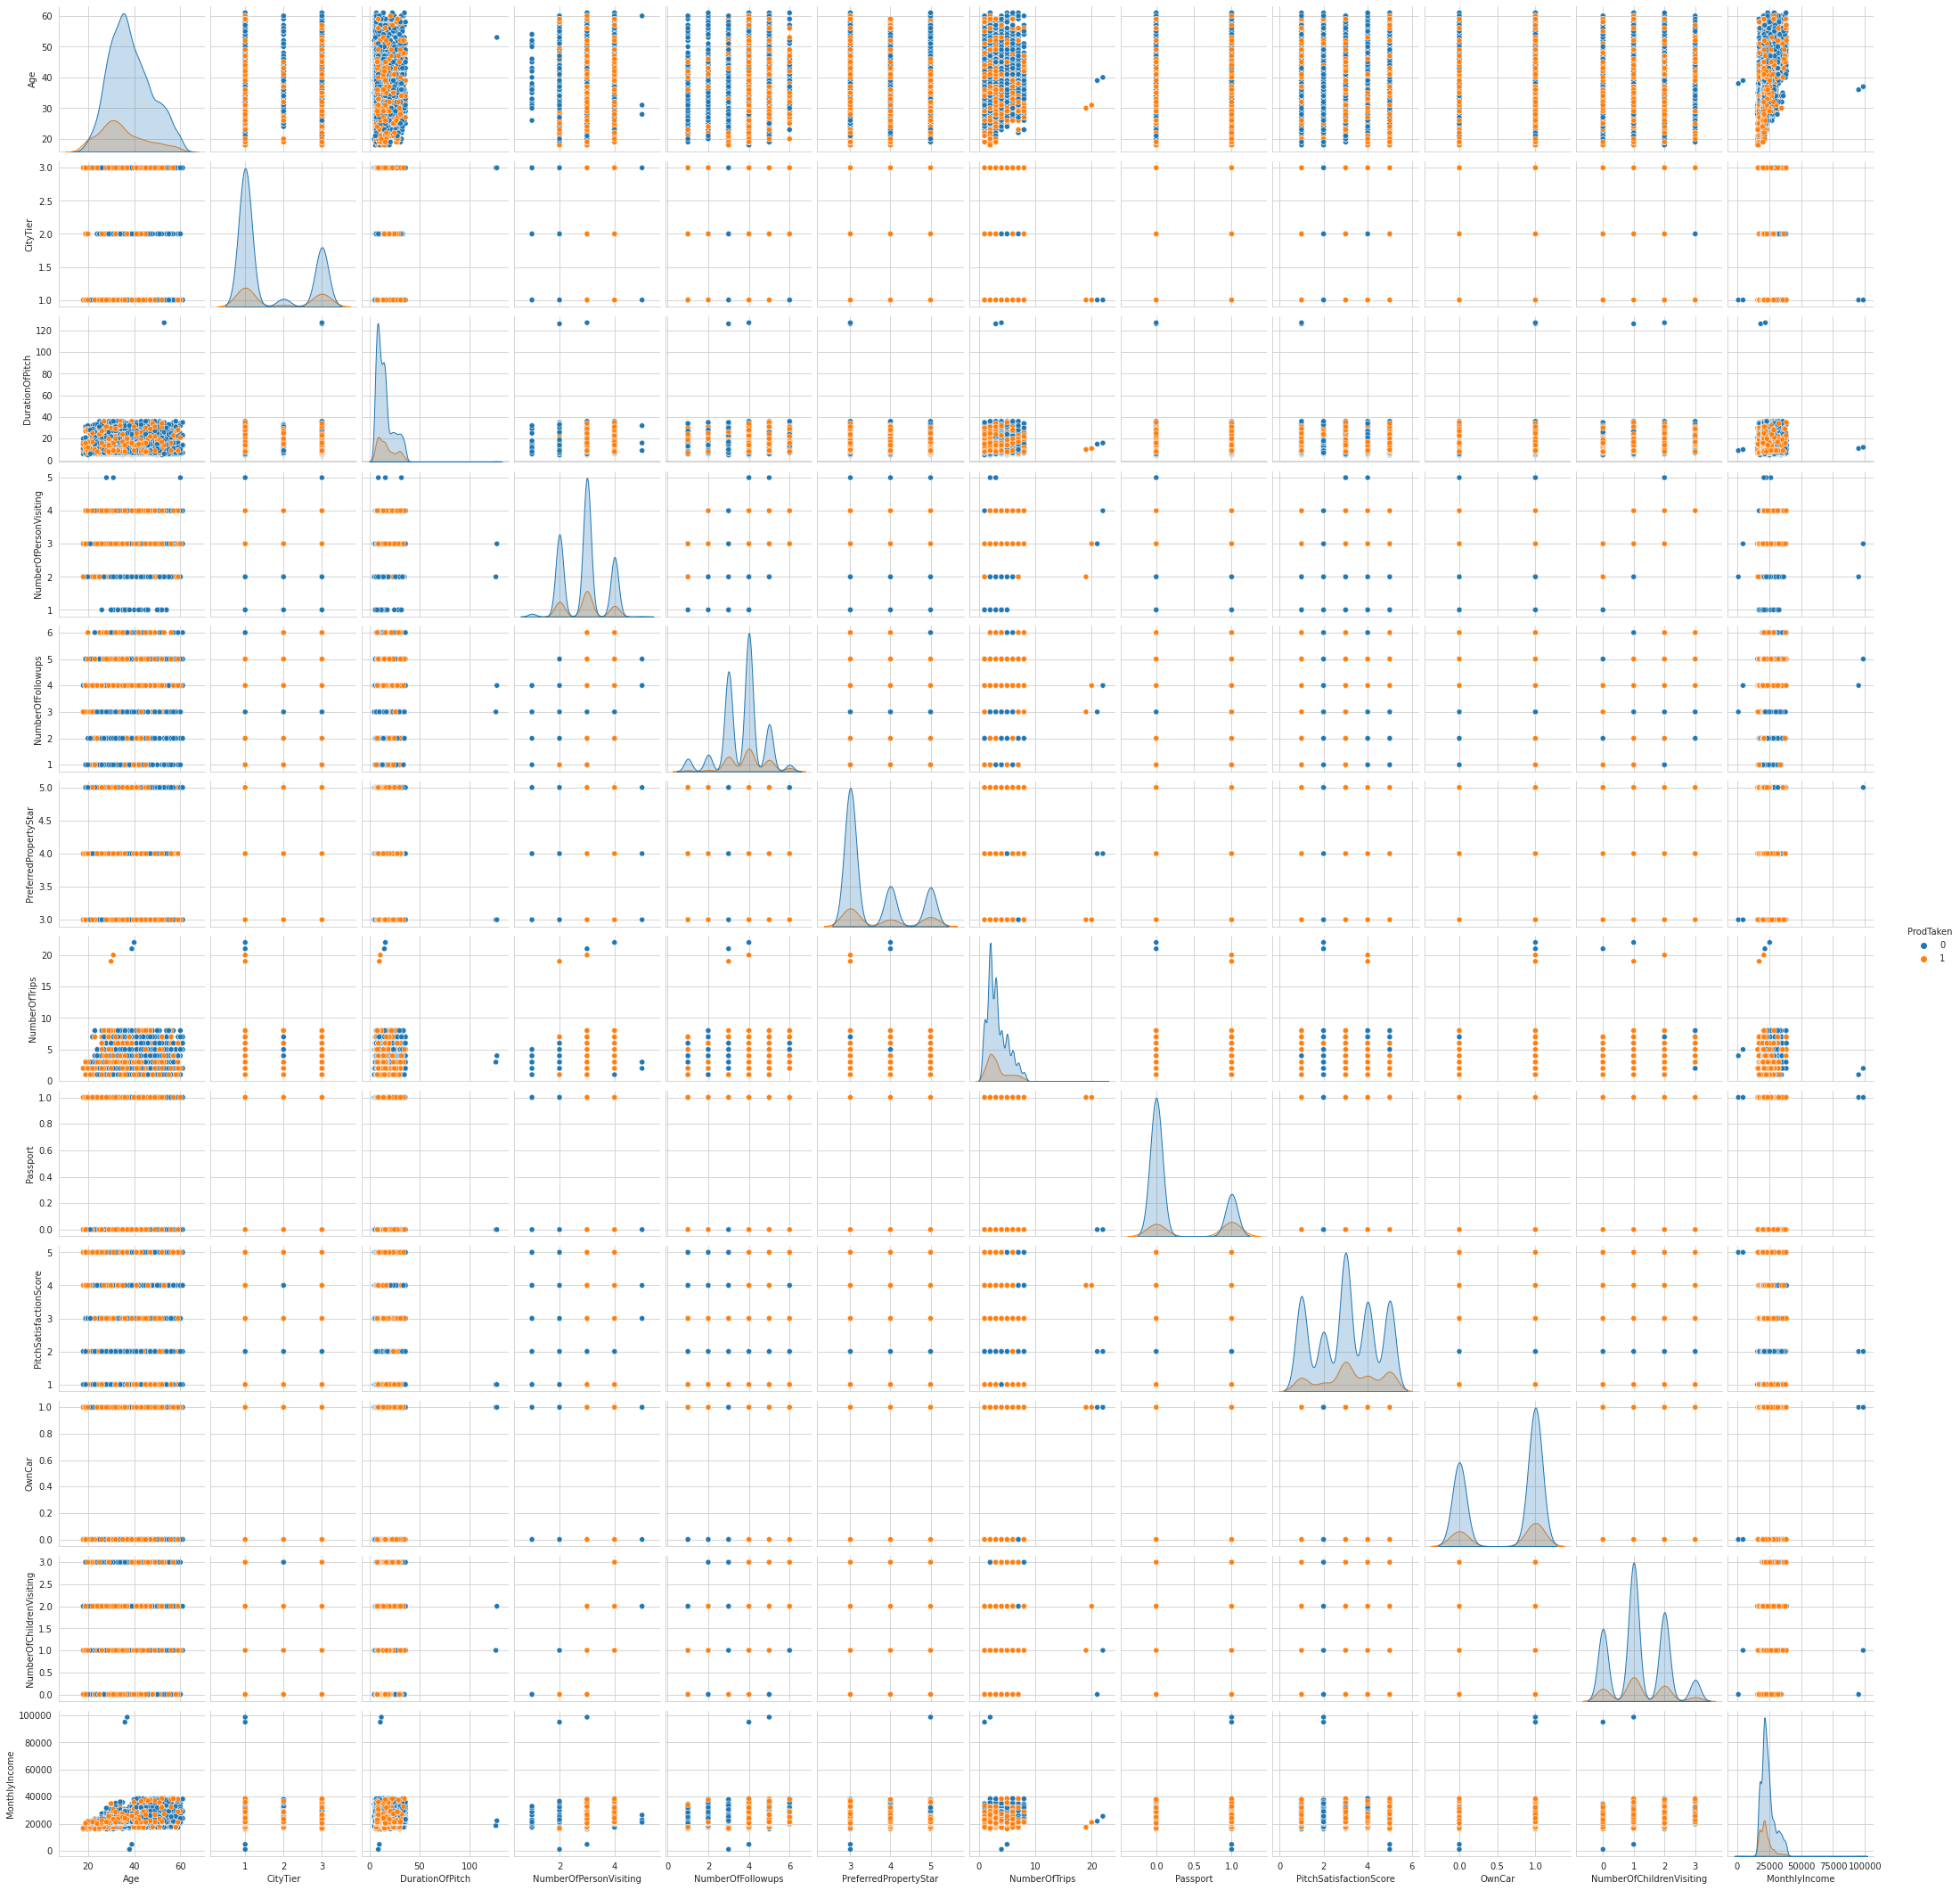

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set_style('whitegrid')
sns.pairplot(data=df_pack,hue='ProdTaken')
plt.show()
plt.savefig('pairplot.png')

In [12]:
quant_cols = ['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome']

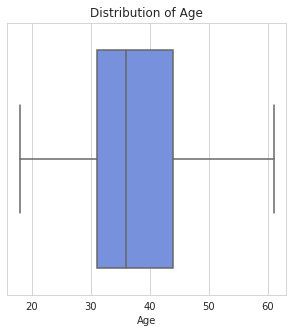

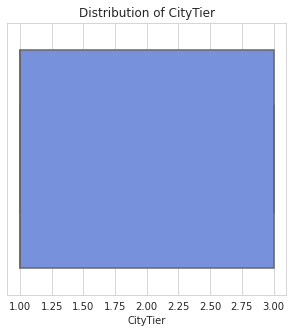

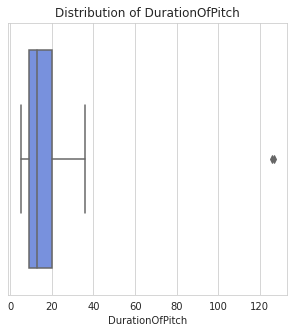

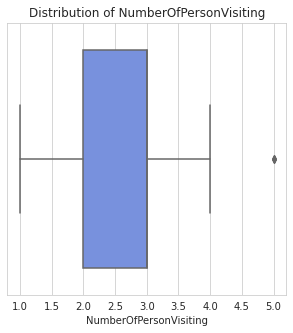

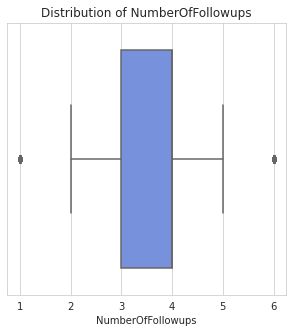

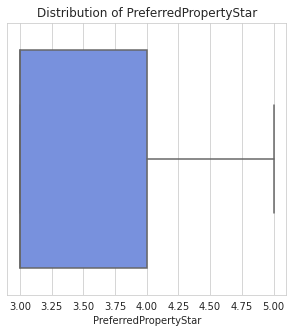

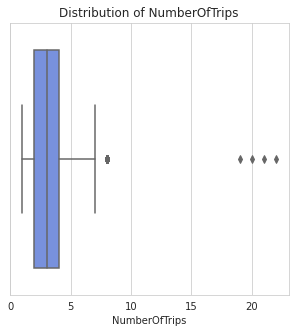

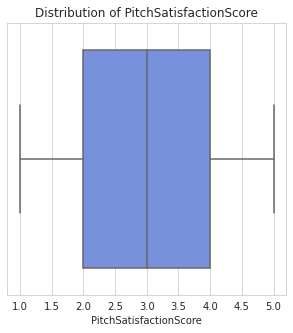

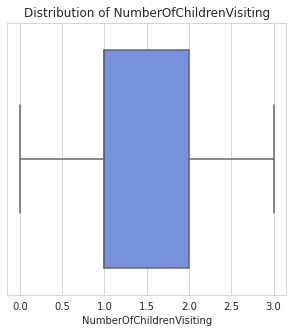

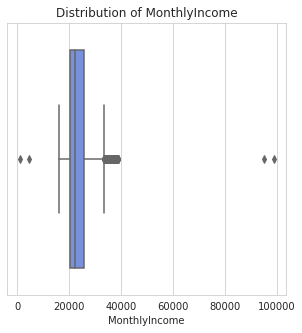

In [13]:
for i  in quant_cols:
  plt.figure(figsize=(5,5))
  sns.set_palette('coolwarm')
  sns.boxplot(x=df_pack[i])
  plt.title('Distribution of '+i)
  plt.show()

Observations
1. Age is normally disributed and has no outlier
2. Distribution of Duration of Pitch is right Skewed with having some outliers greater than 120.
3. Number of person visiting have some outliers.
4. Number of followups is normally disributed
5. Property star has no outlier
6. Number of Trips is right skewed and have outliers greater than 8.
7. PitchSatisfactionScore and NumberOfChildrenVisiting have no outliers.
8. Monthly income has most ouliers and is rightskewed.

In [9]:
cols = ['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation','Agebin','MonthlyIncomebin']
len(cols)

16

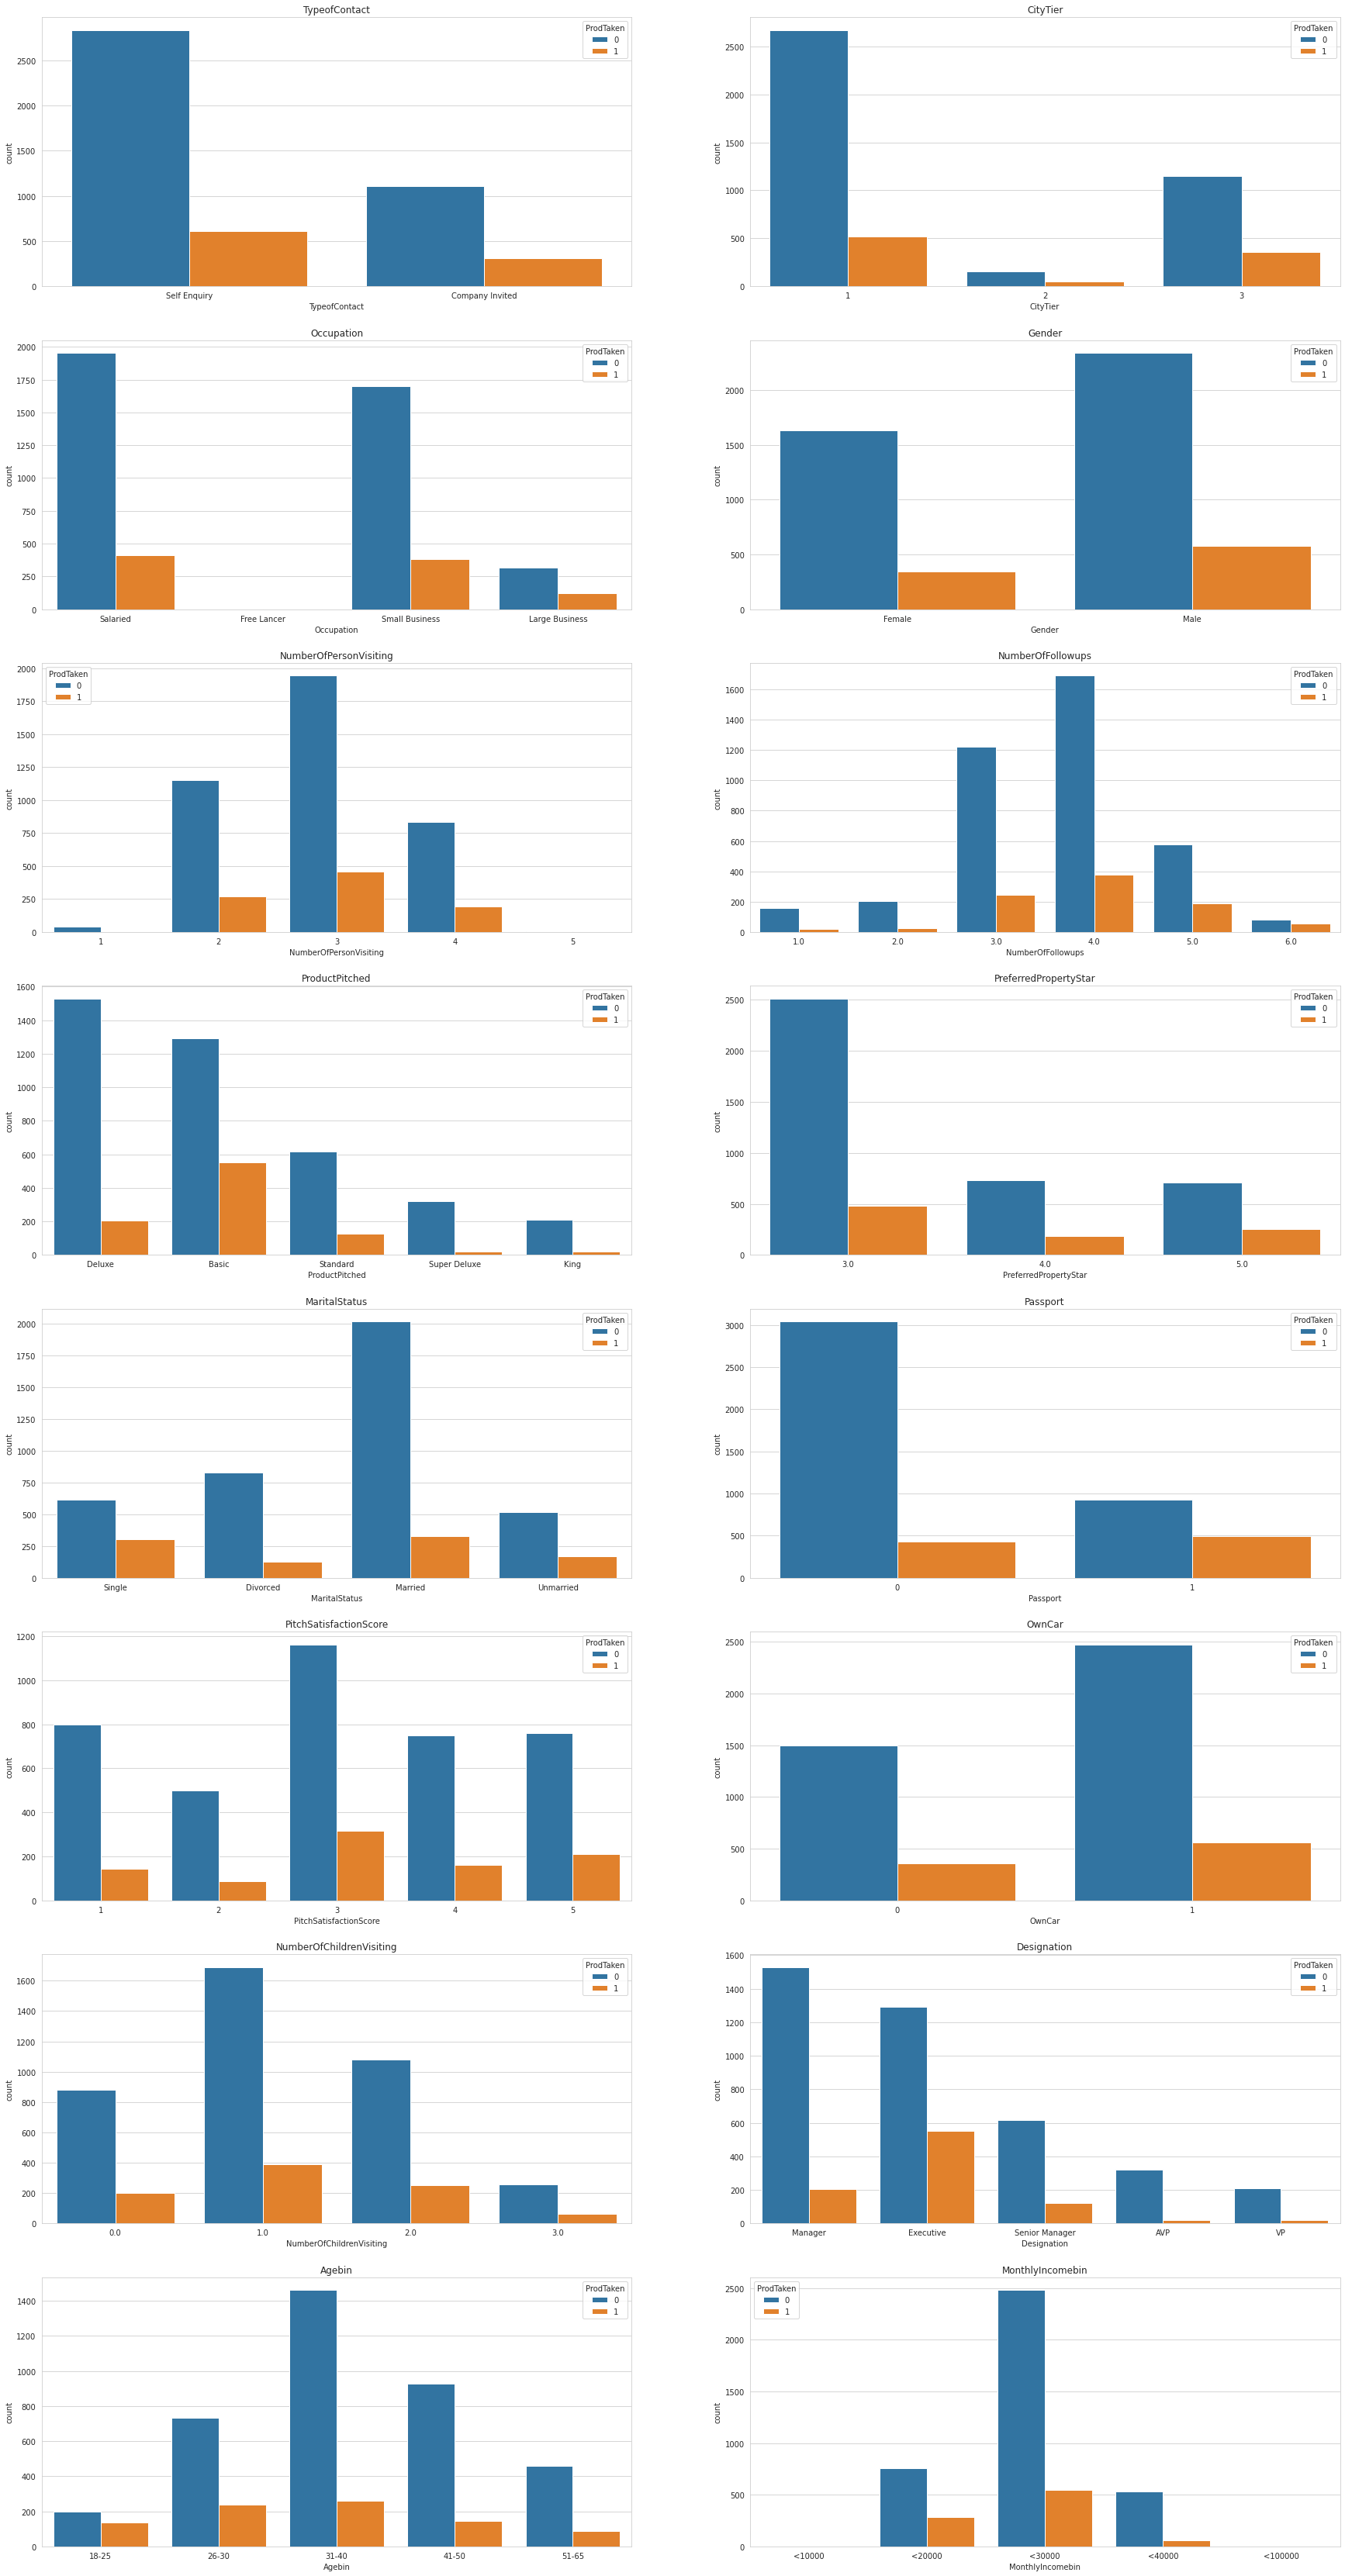

In [10]:

fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13],[ax14,ax15]) = plt.subplots(ncols=2,nrows=8,figsize=(30,60))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]
for i in range(0,16):

  #sns.set(rc={'figure.figsize':(40,20)})
  sns.countplot(data=df_pack,x=cols[i],ax=ax[i],hue='ProdTaken')
  ax[i].set_title(cols[i])

plt.savefig('count.png')


Observations

1. People when called by company usually purchase package more.
2. Large buisness people are not more likely to take the package.
3. Men from city tier 1 purchase more times.
4. Basic property with 3 star property is the basic choice.
5. Person having age between 26 to 40 more likely to purchase.
6. Income should be less than 30000.
7. High designated are not in favour for product.
8. Single and having passport more often purchase the pack. 

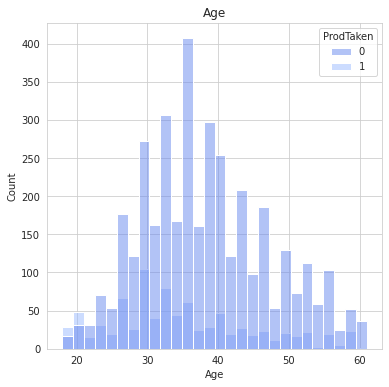

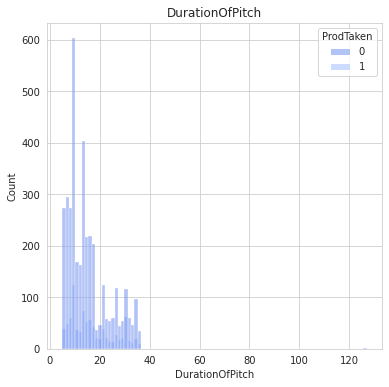

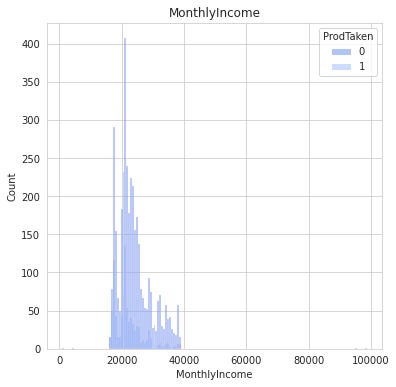

In [16]:
cols = ['Age','DurationOfPitch','MonthlyIncome']
for i in cols:
  plt.figure(figsize=(6,6))
  sns.histplot(x=df_pack[i],hue=df_pack['ProdTaken'])
  plt.title(i)
  plt.savefig(i+'.png')

Observations

1. 10 minutes is the most ideal pitching time for convincing people.
2. Income of 20000 - 30000 is the income of most of the  people who purchased package. 


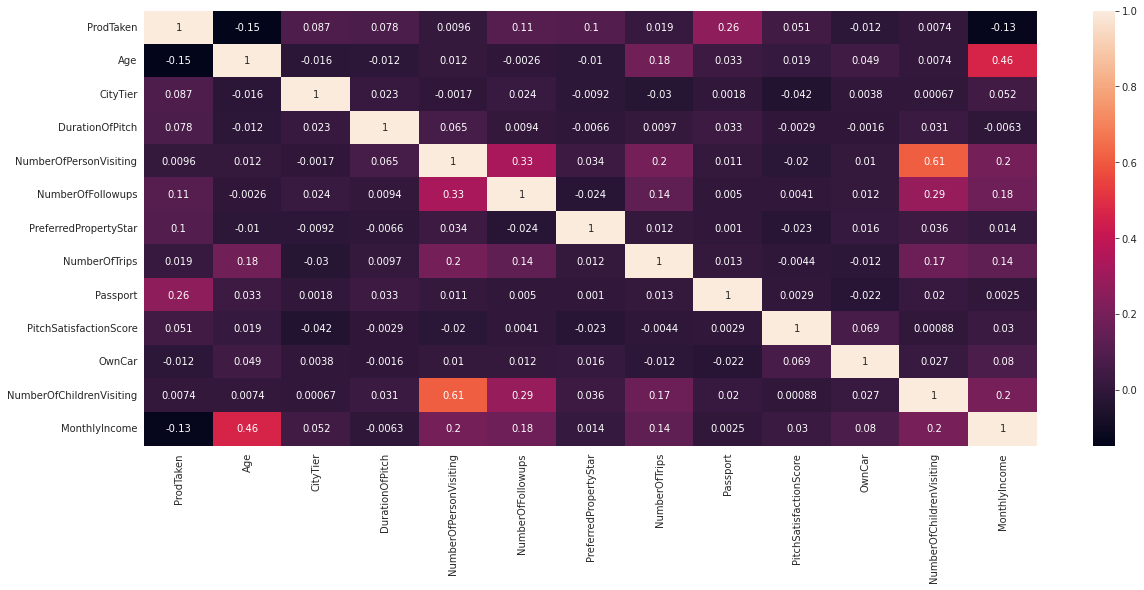

In [19]:
fig,ax = plt.subplots(figsize=(20,8))
sns.heatmap(df_pack.corr(),annot=True,ax=ax)
plt.savefig('corr.png')

NumberOfPersonVisiting and NumberOfChildrenVisiting are more co-related but not need to remove either of them

##Data Handling

####Handling Missing Values

In [ ]:
## filling misising values
df_pack.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
MonthlyIncomebin            233
dtype: int64

In [ ]:
#Age
df_pack['Age'].fillna(df_pack['Age'].median(),inplace=True)
print(df_pack['Age'].median())

36.0


In [ ]:
##Type of Contact
df_pack['TypeofContact'].fillna('Self Enquiry',inplace=True)
df_pack['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [ ]:
# duration of pitch
df_pack['DurationOfPitch'].fillna(int(df_pack['DurationOfPitch'].mean()),inplace=True)

In [ ]:
# number of followups
df_pack['NumberOfFollowups'].fillna(4.0,inplace=True)

##property star
df_pack['PreferredPropertyStar'].fillna(3.0,inplace=True)

## number of trips
df_pack['NumberOfTrips'].fillna(df_pack['NumberOfTrips'].mode()[0],inplace=True)

## child visitng
df_pack['NumberOfChildrenVisiting'].fillna(df_pack['NumberOfChildrenVisiting'].mode()[0],inplace=True)

In [ ]:
## monthly income
df_pack['MonthlyIncome'].fillna(df_pack['MonthlyIncome'].mean(),inplace=True)

In [ ]:
# Age and Monthly income missing value

df_pack['Agebin'] = pd.cut(df_pack['Age'], bins = [17,25, 31, 40, 50, 65], labels = ['17-25','26-30', '31-40', '41-50', '51-65'])

df_pack['MonthlyIncomebin'] = pd.cut(df_pack['MonthlyIncome'],bins=[0,10000,20000,30000,40000,100000],
                                     labels=['<10000','<20000','<30000','<40000','<100000'])

In [ ]:
df_pack.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
MonthlyIncomebin            0
dtype: int64

All the missing values are handled

####Outlier Detection

**Outlier Detection**

Using Inter Quantile Range (IQR)

In [ ]:
q1 = df_pack.quantile(0.25)
q3 = df_pack.quantile(0.75)

iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [ ]:
((df_pack.select_dtypes(include=['float64','int64'])<lower) | (df_pack.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_pack)*100

ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.291326
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.671849
dtype: float64

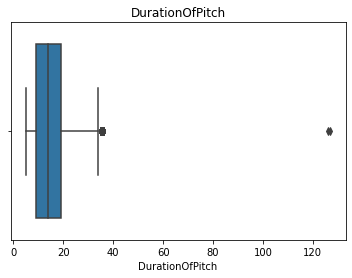

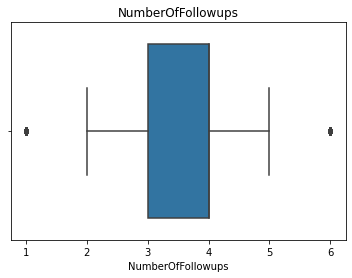

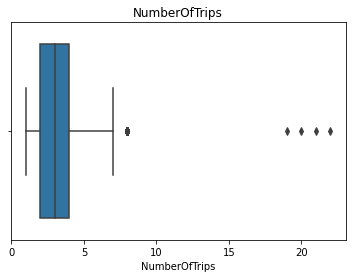

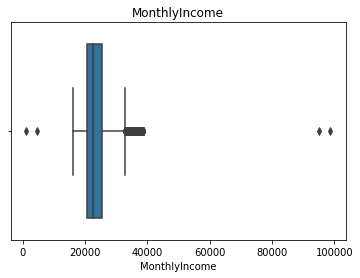

In [ ]:
cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome']
for i in cols:
  sns.boxplot(x=df_pack[i])
  plt.title(i)
  plt.show()

Outliers

Duration of pitch -- >38 minutes

Number of followups -- <2 and >5

Number of trips --   >7 Trips

Monthly Income -- <15000 and >36000

In [ ]:
# removing Outliers

df_pack.drop(index=df_pack[df_pack.DurationOfPitch>37].index,inplace=True)

df_pack.drop(index=df_pack[(df_pack.MonthlyIncome>36000) | (df_pack.MonthlyIncome<15000)].index,inplace=True)

df_pack.drop(index=df_pack[df_pack.NumberOfTrips>7].index,inplace=True)

df_pack.drop(index=df_pack[(df_pack.NumberOfFollowups>5) | (df_pack.NumberOfFollowups<2)].index,inplace=True)


In [ ]:
# Corelation with Labels
matrix_corr = df_pack.corr()
matrix_corr['ProdTaken'].sort_values()

MonthlyIncome              -0.145260
Age                        -0.143169
OwnCar                     -0.013469
NumberOfChildrenVisiting   -0.011538
NumberOfPersonVisiting     -0.011482
NumberOfTrips              -0.006198
PitchSatisfactionScore      0.062711
CityTier                    0.073764
DurationOfPitch             0.074768
NumberOfFollowups           0.084109
PreferredPropertyStar       0.100686
Passport                    0.263431
ProdTaken                   1.000000
Name: ProdTaken, dtype: float64

####Hot Encoding Columns

One Hot Encoding

Handling category columns

In [ ]:
df_pack[['CityTier']] = df_pack[['CityTier']].astype('category')

In [ ]:
df_pack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4323 non-null   int64   
 1   Age                       4323 non-null   float64 
 2   TypeofContact             4323 non-null   object  
 3   CityTier                  4323 non-null   category
 4   DurationOfPitch           4323 non-null   float64 
 5   Occupation                4323 non-null   object  
 6   Gender                    4323 non-null   object  
 7   NumberOfPersonVisiting    4323 non-null   int64   
 8   NumberOfFollowups         4323 non-null   float64 
 9   ProductPitched            4323 non-null   object  
 10  PreferredPropertyStar     4323 non-null   float64 
 11  MaritalStatus             4323 non-null   object  
 12  NumberOfTrips             4323 non-null   float64 
 13  Passport                  4323 non-null   int64 

In [ ]:
cols = ['TypeofContact','CityTier','Occupation','Gender','ProductPitched','MaritalStatus','Designation','Agebin','MonthlyIncomebin']

df = pd.get_dummies(data = df_pack[cols])

In [ ]:
df.head()

,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,...,Agebin_17-25,Agebin_26-30,Agebin_31-40,Agebin_41-50,Agebin_51-65,MonthlyIncomebin_<10000,MonthlyIncomebin_<20000,MonthlyIncomebin_<30000,MonthlyIncomebin_<40000,MonthlyIncomebin_<100000
0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
c = list(set(df_pack.columns)-set(cols))
for i in c:
  df[i]=df_pack[i]
df.head()

,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,...,MonthlyIncome,NumberOfChildrenVisiting,PreferredPropertyStar,Age,ProdTaken,DurationOfPitch,OwnCar,NumberOfTrips,Passport,NumberOfFollowups
0,0,1,0,0,1,0,0,1,0,1,...,20993.0,0.0,3.0,41.0,1,6.0,1,1.0,1,3.0
1,1,0,1,0,0,0,0,1,0,0,...,20130.0,2.0,4.0,49.0,0,14.0,1,2.0,0,4.0
2,0,1,1,0,0,1,0,0,0,0,...,17090.0,0.0,3.0,37.0,1,8.0,0,7.0,1,4.0
3,1,0,1,0,0,0,0,1,0,1,...,17909.0,1.0,3.0,33.0,0,9.0,1,2.0,1,3.0
4,0,1,1,0,0,0,0,0,1,0,...,18468.0,0.0,4.0,36.0,0,8.0,1,1.0,0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4887
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TypeofContact_Company Invited  4323 non-null   uint8  
 1   TypeofContact_Self Enquiry     4323 non-null   uint8  
 2   CityTier_1                     4323 non-null   uint8  
 3   CityTier_2                     4323 non-null   uint8  
 4   CityTier_3                     4323 non-null   uint8  
 5   Occupation_Free Lancer         4323 non-null   uint8  
 6   Occupation_Large Business      4323 non-null   uint8  
 7   Occupation_Salaried            4323 non-null   uint8  
 8   Occupation_Small Business      4323 non-null   uint8  
 9   Gender_Female                  4323 non-null   uint8  
 10  Gender_Male                    4323 non-null   uint8  
 11  ProductPitched_Basic           4323 non-null   uint8  
 12  ProductPitched_Deluxe          4323 non-null   u

In [ ]:
df.drop(['TypeofContact_Company Invited','CityTier_2','Occupation_Free Lancer','Gender_Female','ProductPitched_Super Deluxe',
         'MaritalStatus_Divorced','Designation_VP'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4887
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TypeofContact_Self Enquiry  4323 non-null   uint8  
 1   CityTier_1                  4323 non-null   uint8  
 2   CityTier_3                  4323 non-null   uint8  
 3   Occupation_Large Business   4323 non-null   uint8  
 4   Occupation_Salaried         4323 non-null   uint8  
 5   Occupation_Small Business   4323 non-null   uint8  
 6   Gender_Male                 4323 non-null   uint8  
 7   ProductPitched_Basic        4323 non-null   uint8  
 8   ProductPitched_Deluxe       4323 non-null   uint8  
 9   ProductPitched_King         4323 non-null   uint8  
 10  ProductPitched_Standard     4323 non-null   uint8  
 11  MaritalStatus_Married       4323 non-null   uint8  
 12  MaritalStatus_Single        4323 non-null   uint8  
 13  MaritalStatus_Unmarried     4323 

In [ ]:
df['ProdTaken'].value_counts()

0    3519
1     804
Name: ProdTaken, dtype: int64

##Splitting the Data

Using Stratified Sampling to split the data.

ProdTaken

0 ---  3519

1 ---   804

In [ ]:
## making X and Y matrices

X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3458, 39), (865, 39), (3458,), (865,))

In [ ]:
print('Data Frame')
print((df['ProdTaken'].value_counts())/len(df))
print('*'*50)
print('X Train')
print((y_train.value_counts())/len(y_train))

Data Frame
0    0.814018
1    0.185982
Name: ProdTaken, dtype: float64
**************************************************
X Train
0    0.814054
1    0.185946
Name: ProdTaken, dtype: float64


In [ ]:
## Scalling the Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##Running Model Experiments

1. Model0: Support Vector Classifier (SVC)
2. Model1: Random Forest Classifier (Bagging Ensemble Technique)
3. Model2: Gradient Boosting/AdaBoost (Boosting Ensemble Technique)
4. Model3: Dense Neural Network

In [ ]:

## Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,ConfusionMatrixDisplay
def plot_conf(y_true,y_preds,train_label,train_preds):
  cm = confusion_matrix(y_true,y_preds,labels=[0,1])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
  disp.plot(cmap='Greens',colorbar=True)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Test')
  plt.show()
  cm = confusion_matrix(train_label,train_preds,labels=[0,1])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
  disp.plot(cmap='Greens',colorbar=True)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Train')
  plt.show()


## Classification report

def class_report(y_true,y_preds):
  print(classification_report(y_true,y_preds))

## scores
def evaluation(y_true,y_preds,title):
  print(title)
  print({'Accuracy':accuracy_score(y_true,y_preds),
        'Recall':recall_score(y_true,y_preds),
        'Precision':precision_score(y_true,y_preds),
        'F1':f1_score(y_true,y_preds)})



###Model0: Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

classifier = SVC()

np.random.seed(42)
classifier.fit(x_train_scaled,y_train)

SVC()

In [ ]:
np.random.seed(42)
train_preds = classifier.predict(x_train_scaled)
svc_preds = classifier.predict(x_test_scaled)
svc_preds

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

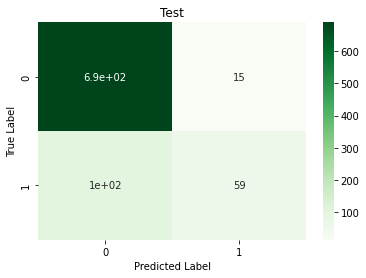

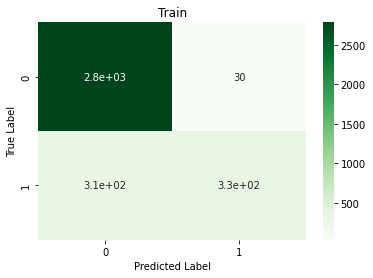

In [ ]:
plot_conf(y_test,svc_preds,y_train,train_preds)

In [ ]:
class_report(y_test,svc_preds)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       704
           1       0.80      0.37      0.50       161

    accuracy                           0.86       865
   macro avg       0.83      0.67      0.71       865
weighted avg       0.86      0.86      0.84       865



In [ ]:
evaluation(y_test,svc_preds,'SVC')

SVC
{'Accuracy': 0.8647398843930636, 'Recall': 0.36645962732919257, 'Precision': 0.7972972972972973, 'F1': 0.5021276595744681}


Model 0 is not learning well needs to increase complexity

Try to increase performance by Hyperparameter Tunning

In [ ]:
## tuning hyperparameter

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale','auto'],
              'class_weight':['balanced',None],
              'decision_function_shape':['ovo','ovr'],
              'shrinking':[True,False]}

In [ ]:
clf = RandomizedSearchCV(classifier,param_grid,n_iter=20,cv=5,verbose=1)

In [ ]:
np.random.seed(42)
clf.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'class_weight': ['balanced', None],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   verbose=1)

In [ ]:
clf.best_params_

{'shrinking': True,
 'kernel': 'poly',
 'gamma': 'scale',
 'decision_function_shape': 'ovr',
 'class_weight': None}

In [ ]:
np.random.seed(42)
classifier = SVC(shrinking=True,kernel='poly',gamma='scale',decision_function_shape='ovr',class_weight=None)
classifier.fit(x_train_scaled,y_train)

SVC(kernel='poly')

In [ ]:
np.random.seed(42)
train_preds = classifier.predict(x_train_scaled)
svc_preds = classifier.predict(x_test_scaled)

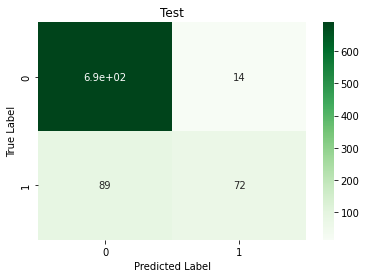

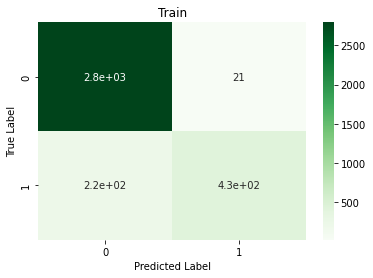

In [ ]:
plot_conf(y_test,svc_preds,y_train,train_preds)

In [ ]:
class_report(y_test,svc_preds)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       704
           1       0.84      0.45      0.58       161

    accuracy                           0.88       865
   macro avg       0.86      0.71      0.76       865
weighted avg       0.88      0.88      0.87       865



In [ ]:
evaluation(y_test,svc_preds,'SVC')

SVC
{'Accuracy': 0.8809248554913295, 'Recall': 0.4472049689440994, 'Precision': 0.8372093023255814, 'F1': 0.5829959514170041}


Observation

Accuracy improved to 88.092.

Recall score achieved 44.7204.

###Model1:Random Forest Classifier (Bagging Ensemble Technique)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
np.random.seed(42)
train_preds = rfc.predict(x_train_scaled)
rfc_preds = rfc.predict(x_test_scaled)

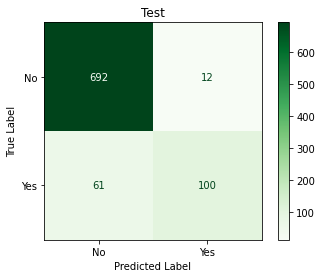

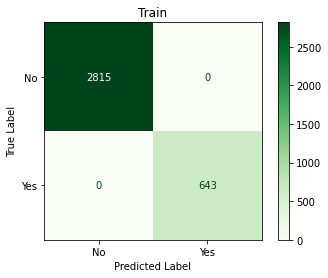

In [ ]:
plot_conf(y_test,rfc_preds,y_train,train_preds)

In [ ]:
class_report(y_test,rfc_preds)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       704
           1       0.89      0.62      0.73       161

    accuracy                           0.92       865
   macro avg       0.91      0.80      0.84       865
weighted avg       0.91      0.92      0.91       865



In [ ]:
evaluation(y_test,rfc_preds,'Random Forest Classifier')

Random Forest Classifier
{'Accuracy': 0.915606936416185, 'Recall': 0.6211180124223602, 'Precision': 0.8928571428571429, 'F1': 0.7326007326007327}


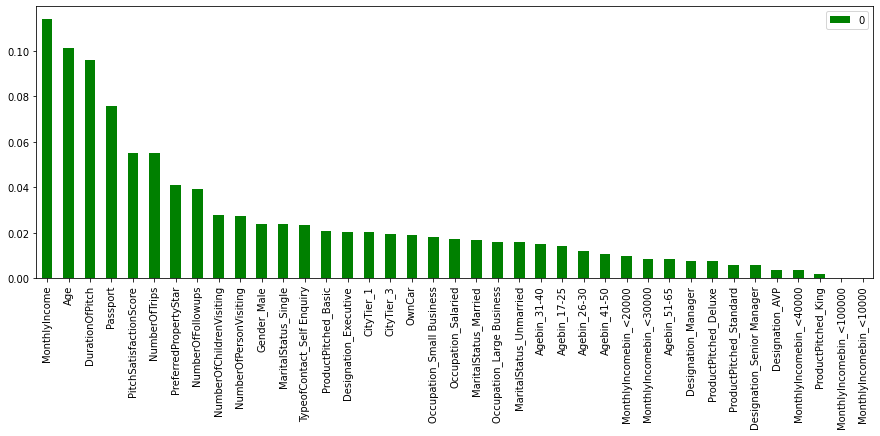

In [ ]:
data = pd.DataFrame(index=x_train.columns,data=rfc.feature_importances_)
data.sort_values(by=0,ascending=False).plot(kind='bar',color='green',figsize=(15,5))


Seems like model is overfitting trying to increase efficiency by tunning hyperparameter 

In [ ]:
## tuning hyperparameters

param_grid = {"max_depth":[9,15,30,None],
              'criterion':['entropy','gini'],
              "n_estimators": [150,250,500,700,1000],
              "min_samples_leaf": np.arange(1, 9),
              "max_features": ['auto','sqrt','log2',None],
              "max_samples": [None,0.3,1,0.5]}


In [ ]:
clf = RandomizedSearchCV(rfc,param_grid,n_iter=20,cv=5,verbose=2)

np.random.seed(42)
clf.fit(x_train_scaled,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=None, max_samples=1, min_samples_leaf=3, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=15, max_features=None, max_samples=1, min_samples_leaf=3, n_estimators=500; total time=   0.5s
[CV

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=9,
                                                    max_samples=0.3,
                                                    min_samples_leaf=5,
                                                    n_estimators=700),
                   n_iter=20,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [9, 15, 30, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_samples': [None, 0.3, 1, 0.5],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'n_estimators': [150, 250, 500, 700,
                                                         1000]},
                   verbose=2)

In [ ]:
clf.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 3,
 'max_samples': 0.5,
 'max_features': None,
 'max_depth': 9,
 'criterion': 'gini'}

In [ ]:
np.random.seed(42)
rfc = RandomForestClassifier(n_estimators=250,min_samples_leaf=3,max_samples=0.5,max_depth=9)
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=9, max_samples=0.5, min_samples_leaf=3,
                       n_estimators=250)

In [ ]:
np.random.seed(42)
train_preds = rfc.predict(x_train_scaled)
rfc_preds = rfc.predict(x_test_scaled)

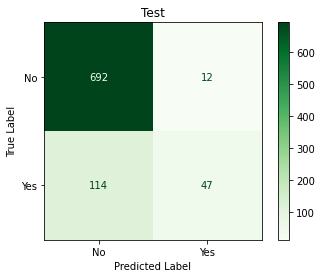

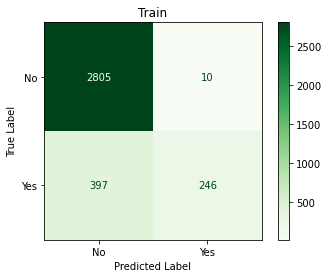

In [ ]:
plot_conf(y_test,rfc_preds,y_train,train_preds)

Model is performing Worse after tuning



Conclusion

1. Accuracy achieved --- 91.560
2. Recall Score --- 62.111
3. MonthlyIncome, Age, DurationOfPitch, Passport are the most important Features.


###Model2:Gradient Boosting/AdaBoost (Boosting Ensemble Technique)

####Model2A:Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

np.random.seed(42)
gbc = HistGradientBoostingClassifier()
gbc.fit(x_train_scaled,y_train)

HistGradientBoostingClassifier()

In [ ]:
np.random.seed(42)
train_preds = gbc.predict(x_train_scaled)
gbc_preds = gbc.predict(x_test_scaled)

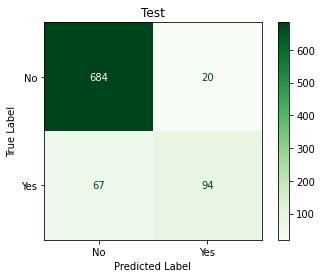

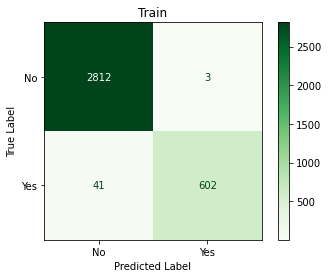

In [ ]:
plot_conf(y_test,gbc_preds,y_train,train_preds)

In [ ]:
class_report(y_test,gbc_preds)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       704
           1       0.82      0.58      0.68       161

    accuracy                           0.90       865
   macro avg       0.87      0.78      0.81       865
weighted avg       0.89      0.90      0.89       865



In [ ]:
evaluation(y_test,gbc_preds,'Gradient Boosting Classifier')

Gradient Boosting Classifier
{'Accuracy': 0.8994219653179191, 'Recall': 0.5838509316770186, 'Precision': 0.8245614035087719, 'F1': 0.6836363636363637}


In [ ]:
## hyperparameter tuning

param = {'loss':['binary_crossentropy','auto'],
         'learning_rate':[0.1,0.01,0.001],
         'max_iter':[50,100,120],
         'max_depth':[None,10,20,25],
         'min_samples_leaf':[10,20,30]}

clf = RandomizedSearchCV(gbc,param,n_iter=20,cv=5,verbose=2)

np.random.seed(42)
clf.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=20, max_iter=120, min_samples_leaf=10; total time=   2.5s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=20, max_iter=120, min_samples_leaf=10; total time=   0.5s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=20, max_iter=120, min_samples_leaf=10; total time=   0.5s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=20, max_iter=120, min_samples_leaf=10; total time=   0.5s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=20, max_iter=120, min_samples_leaf=10; total time=   0.5s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=None, max_iter=50, min_samples_leaf=10; total time=   0.2s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=None, max_iter=50, min_samples_leaf=10; total time=   0.2s
[CV] END learning_rate=0.01, loss=binary_crossentropy, max_depth=None, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 251, in fit
    self._validate_parameters()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 85, in _validate_parameters
    self.loss

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'loss': ['binary_crossentropy',
                                                 'log_loss', 'auto'],
                                        'max_depth': [None, 10, 20, 25],
                                        'max_iter': [50, 100, 120],
                                        'min_samples_leaf': [10, 20, 30]},
                   verbose=2)

In [ ]:
clf.best_params_

{'min_samples_leaf': 20,
 'max_iter': 120,
 'max_depth': 20,
 'loss': 'binary_crossentropy',
 'learning_rate': 0.1}

In [ ]:
gbc = HistGradientBoostingClassifier(min_samples_leaf=20,max_iter=120,max_depth=20,loss='binary_crossentropy',learning_rate=0.1)

np.random.seed(42)
gbc.fit(x_train_scaled,y_train)

HistGradientBoostingClassifier(loss='binary_crossentropy', max_depth=20,
                               max_iter=120)

In [ ]:
np.random.seed(42)
train_preds = gbc.predict(x_train_scaled)
rfc_preds = gbc.predict(x_test_scaled)

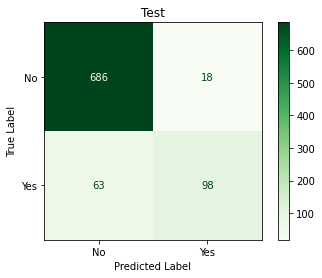

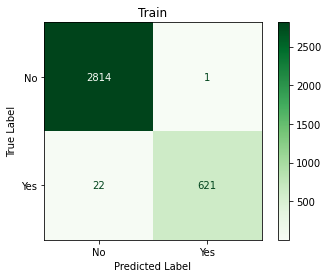

In [ ]:
plot_conf(y_test,rfc_preds,y_train,train_preds)

In [ ]:
class_report(y_test,gbc_preds)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       704
           1       0.82      0.58      0.68       161

    accuracy                           0.90       865
   macro avg       0.87      0.78      0.81       865
weighted avg       0.89      0.90      0.89       865



In [ ]:
evaluation(y_test,gbc_preds,'Gradient Boosting Classifier')

Gradient Boosting Classifier
{'Accuracy': 0.8994219653179191, 'Recall': 0.5838509316770186, 'Precision': 0.8245614035087719, 'F1': 0.6836363636363637}


####Model2B: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adc = AdaBoostClassifier()

np.random.seed(42)
adc.fit(x_train_scaled,y_train)

AdaBoostClassifier()

In [ ]:
np.random.seed(42)
train_preds = adc.predict(x_train_scaled)
adc_preds = adc.predict(x_test_scaled)

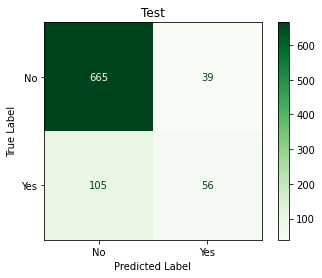

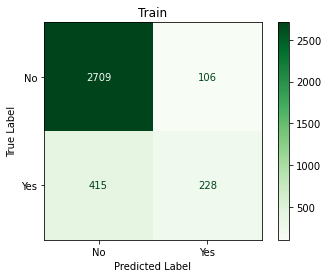

In [ ]:
plot_conf(y_test,adc_preds,y_train,train_preds)

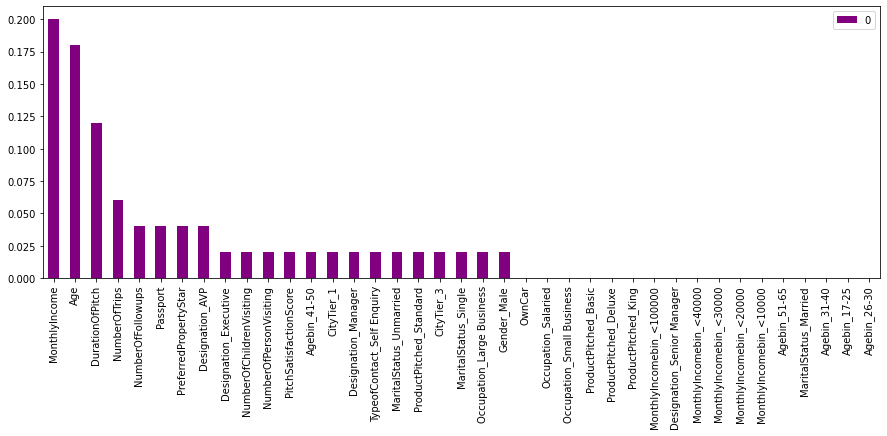

In [ ]:
data = pd.DataFrame(index=x_train.columns,data=adc.feature_importances_)
data.sort_values(by=0,ascending=False).plot(kind='bar',color='purple',figsize=(15,5))


In [ ]:
class_report(y_test,adc_preds)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       704
           1       0.59      0.35      0.44       161

    accuracy                           0.83       865
   macro avg       0.73      0.65      0.67       865
weighted avg       0.81      0.83      0.82       865



Getting a low recall score need to tune hyperparameters

In [ ]:
# tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

param = {'n_estimators':[50,25,100,125],
         'learning_rate':[0.1,0.01],
         'algorithm':['SAMME','SAMME.R']}

clf = RandomizedSearchCV(adc,param,n_iter=20,cv=5)

np.random.seed(42)
clf.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.01],
                                        'n_estimators': [50, 25, 100, 125]})

In [ ]:
clf.best_params_

{'n_estimators': 125, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

In [ ]:
adc = AdaBoostClassifier(n_estimators=125,learning_rate=0.1)

np.random.seed(42)
adc.fit(x_train_scaled,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=125)

In [ ]:
np.random.seed(42)
train_preds = adc.predict(x_train_scaled)
adc_preds = adc.predict(x_test_scaled)

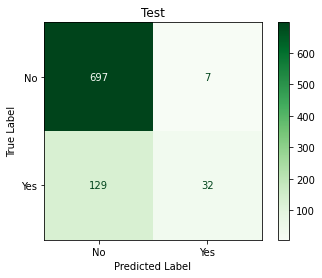

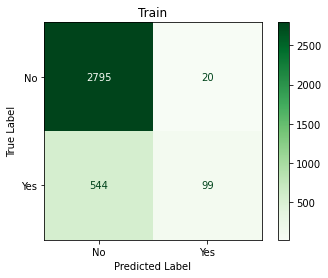

In [ ]:
plot_conf(y_test,adc_preds,y_train,train_preds)

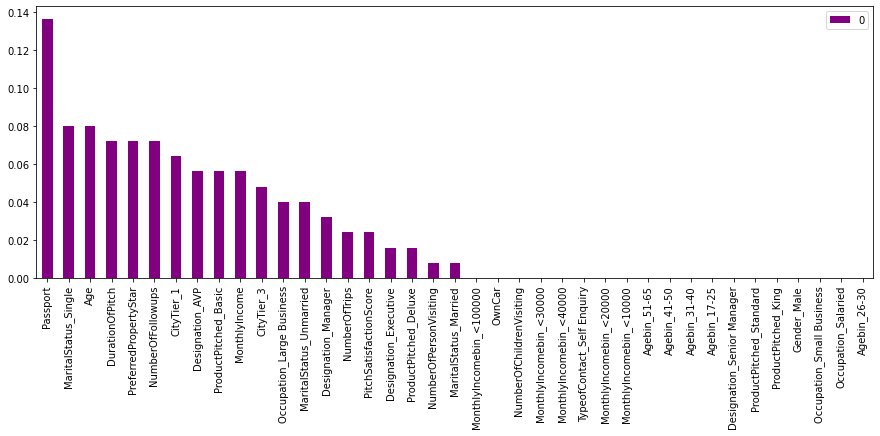

In [ ]:
data = pd.DataFrame(index=x_train.columns,data=adc.feature_importances_)
data.sort_values(by=0,ascending=False).plot(kind='bar',color='purple',figsize=(15,5))


In [ ]:
class_report(y_test,adc_preds)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       704
           1       0.82      0.20      0.32       161

    accuracy                           0.84       865
   macro avg       0.83      0.59      0.62       865
weighted avg       0.84      0.84      0.80       865



Conclusion

Gradient Boosting performs better than AdaBoost but not able to surpass Random Forest Classifier.

###Model3:Dense Neural Network

Using `Tensorflow` for neural network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
### input size
x_train_scaled[0].shape

(39,)

In [ ]:
## creating model
inputs = tf.keras.Input(shape=(39,))
x = Dense(256,activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs,outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 39)]              0         
                                                                 
 dense_5 (Dense)             (None, 256)               10240     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 43,265
Trainable params: 43,265
Non-trainable

In [ ]:
## compiling the model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
## creating callbacks

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='accuracy',patience=4,verbose=1)

In [ ]:
## training data

np.random.seed(42)
dnn = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),batch_size=32,epochs=25,callbacks=[early_stop])

Epoch 1/25
109/109 [==============================] - 2s 9ms/step - loss: 0.4072 - accuracy: 0.8245 - val_loss: 0.4055 - val_accuracy: 0.8474
Epoch 2/25
109/109 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.8421 - val_loss: 0.3848 - val_accuracy: 0.8566
Epoch 3/25
109/109 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8595 - val_loss: 0.3818 - val_accuracy: 0.8474
Epoch 4/25
109/109 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8664 - val_loss: 0.3836 - val_accuracy: 0.8474
Epoch 5/25
109/109 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8730 - val_loss: 0.3722 - val_accuracy: 0.8613
Epoch 6/25
109/109 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8809 - val_loss: 0.3782 - val_accuracy: 0.8566
Epoch 7/25
109/109 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.8861 - val_loss: 0.3618 - val_accuracy: 0.8578
Epoch 

In [ ]:
model.evaluate(x_test_scaled,y_test)

28/28 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.9145


[0.30345821380615234, 0.9144508838653564]

In [ ]:
data = pd.DataFrame(data=dnn.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.407235,0.824465,0.405526,0.847399
1,0.356513,0.842105,0.384764,0.856647
2,0.334293,0.859456,0.381762,0.847399
3,0.319952,0.866397,0.383626,0.847399
4,0.300905,0.873048,0.372163,0.861272


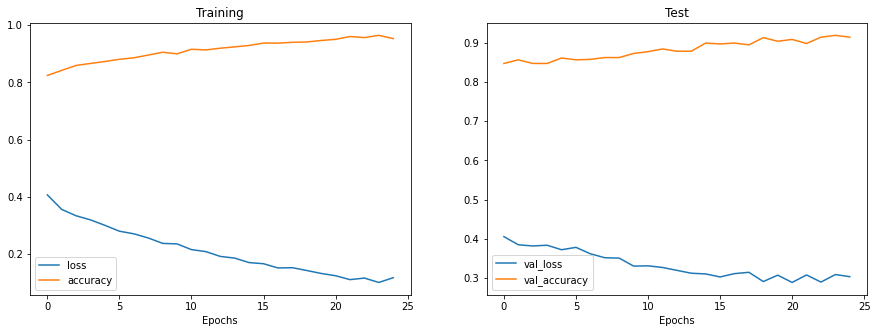

In [ ]:
## ploting the data
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax0.plot(data['loss'])
ax0.plot(data['accuracy'])
ax0.set_title('Training')
ax0.set_xlabel('Epochs')
ax0.legend(['loss','accuracy'])
ax1.plot(data['val_loss'])
ax1.plot(data['val_accuracy'])
ax1.set_title('Test')
ax1.set_xlabel('Epochs')
ax1.legend(['val_loss','val_accuracy'])


In [ ]:
## predictions
np.random.seed(42)
train_preds = model.predict(x_train_scaled)
train_preds = tf.squeeze(tf.round(train_preds))
dnn_preds = model.predict(x_test_scaled)
dnn_preds = tf.squeeze(tf.round(dnn_preds))

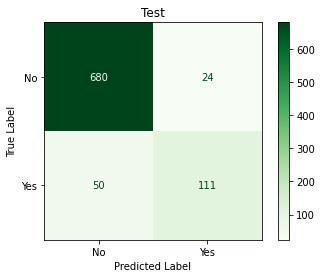

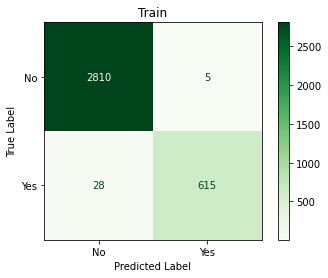

In [ ]:
plot_conf(y_test,dnn_preds,y_train,train_preds)

In [ ]:
class_report(y_test,dnn_preds)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       704
           1       0.82      0.69      0.75       161

    accuracy                           0.91       865
   macro avg       0.88      0.83      0.85       865
weighted avg       0.91      0.91      0.91       865



In [ ]:
evaluation(y_test,dnn_preds,'Dense Neural Network')

Dense Neural Network
{'Accuracy': 0.9144508670520232, 'Recall': 0.6894409937888198, 'Precision': 0.8222222222222222, 'F1': 0.7500000000000001}


###Conclusion



*   Dense Neural Network (Model3) seems to be the most generalised model.
*   Random Forest can improve by tuning it with other parameters.
*   Looking at the feature importance MonthlyIncome, Age, Durationof Pitch, Passport, NumberofTrips seems to be more important.
*   ProductPitched, Designation, particular range of income and Age can be ignored. 

